Vi starter med at definere en funktion for vores forsøg. En måling defineres som at slå med en terning N gange og lægge øjnene sammen. Dette gentages så 10 000 gange.

In [81]:
import numpy as np

np.random.seed(1)

# Kast en terning N gange og lægger øjnene sammen. Gentager dette 10 000 gange.
def diceroll(N):
    # Terningens egenskaber
    muligheder = [1,2,3,4,5,6]
    # Terningen er vægtet så 6 er mere sandsynligt end de andre øjne
    sandsynligheder = [0.9/6, 0.9/6, 0.9/6, 0.9/6, 0.9/6, 1.5/6] 
    kast_arr = np.random.choice(muligheder, (10000, N), p=sandsynligheder)
    return [np.sum(kast) for kast in kast_arr]
    



In [109]:
# Normalfordelingen
def normal_distribution(x, sigma, mu, k):
    return (1/(sigma * np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/2*(sigma**2)) * k


c:\Users\marcu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


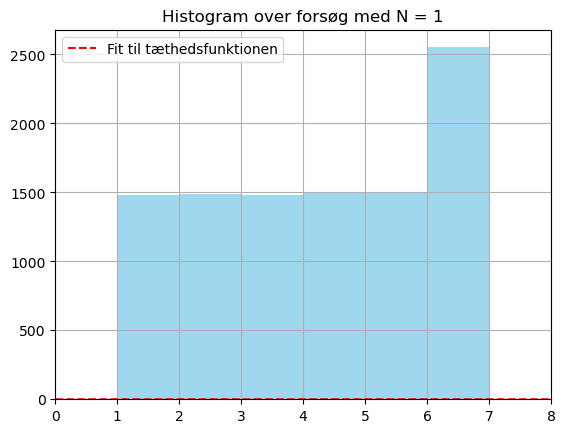

In [207]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot(N):
    data = diceroll(N)

    # Udregn antal bins
    bin_num = np.arange(np.min(data),np.max(data)+2)

    # Tegn histogrammet
    counts, bin_edges, patches = plt.hist(data, bins=bin_num, color="skyblue", alpha=0.8)
    

    # Find midten af binsne
    bin_centers = np.delete(bin_edges, -1)
    bin_centers += 0.5

    #plt.scatter(bin_centers, counts, color="r", marker=".")

    # Fit tæthedsfunktionen fra normalfordelingen til histogrammet
    # Startgæt
    
    sigma_g = 1
    mu_g = float(bin_centers[np.where(counts == (max(counts)))])
    k_g = 1

    if N == 1:
        sigma_g = 1
        mu_g = np.mean(counts) + 10
        k_g = 1

    par, cov = curve_fit(normal_distribution, bin_centers, counts, p0=[sigma_g, mu_g, k_g], maxfev=10000)    
    
    # Plot tæthedsfunktionen
    X = np.linspace(0, max(bin_edges + 2), 100*len(data))
    plt.plot(X, normal_distribution(X, *par), color="r", linestyle='dashed', label="Fit til tæthedsfunktionen")

    plt.xlim(min(bin_edges - 1), max(bin_edges + 1))
    plt.title("Histogram over forsøg med N = {}".format(N))
    plt.grid()
    plt.legend()
    plt.show()

plot(1)
